In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys

In [2]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness")
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster")

In [7]:
name = "Effective-Volume"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume already exist. Good to go!


In [8]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Proje

In [9]:
name = files[2].split("/")[-1]
name

'gaia_(0.16)_(0.20).hdf5'

In [10]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


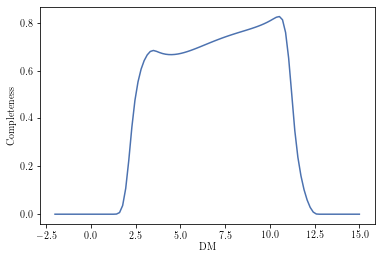

In [11]:
compDM = df_comp["compDM"].to_numpy()
DM = df_comp["DM"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

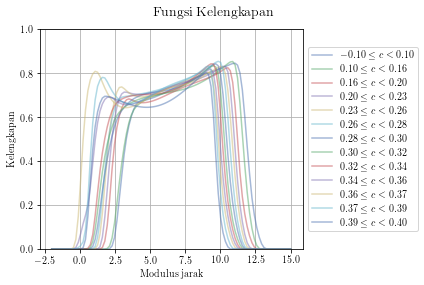

'gaia_(0.39)_(0.40).hdf5'

In [12]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(6, 4))
for file in files:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [13]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

compDM_interp(-20)

array(0.)

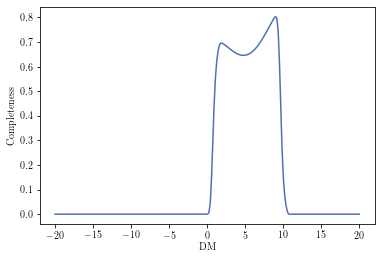

In [14]:
dms = np.linspace(-20, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [15]:
z1 = np.array([ 89. ,  96.5, 112. , 119. , 123.5, 168.5, 191. , 238.5, 262. ,
       288.5, 306. , 288.5, 286.5])

zb= 2*z1

Z = zb[0]
R = 150
zb

array([178., 193., 224., 238., 247., 337., 382., 477., 524., 577., 612.,
       577., 573.])

In [16]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [17]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        if distance>50:
            eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 420.61it/s]


(0.0, 1.0)

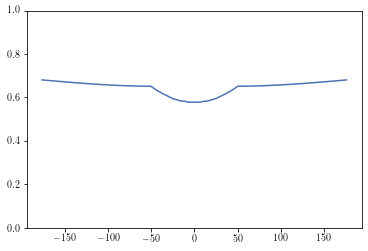

In [18]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

100%|██████████| 99/99 [00:00<00:00, 463.43it/s]


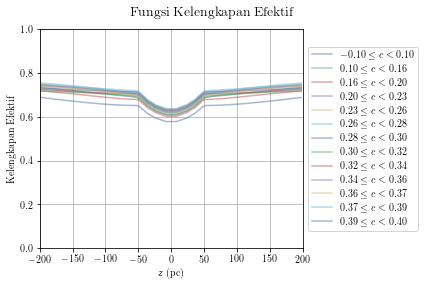

In [19]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 200
R = 150
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
for i, file in enumerate(files):
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel(r"$z$ (pc)")
ax.set_ylabel("Kelengkapan Efektif")
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(-200, 200)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan-efektif.pdf"), dpi=200)

In [20]:
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

In [21]:
gaia_raw = vaex.open(join(spectral_dir, name))
gaia_raw = gaia_raw.dropna()

In [23]:
# for latex table
# for i, zbound in enumerate(zb):
#     name = files[i].split("/")[-1] 
#     c = regex.findall(name)
#     gaia_raw = vaex.open(join(spectral_dir, name))
#     # filter no nan in 'z'
#     gaia = gaia_raw.filter("Dist>50")
#     gaia = gaia.dropna("z")
#     gaia = gaia.extract()
#     N_d_50 = len(gaia)
#     gaia = gaia_raw.filter("abs(z)<50")
#     gaia = gaia.dropna("w")
#     gaia = gaia.extract()
#     N_z_50 = len(gaia)
#     w = gaia["w"].to_numpy()

#     dispersion = np.std(w)
#     print(f"{c[0]} < c < {c[1]} & {zbound} & {N_d_50} & {N_z_50} & {dispersion:.02f} \\\\")

-0.10 < c < 0.10 & 178.0 & 1026 & 429 & 6.33 \\
0.10 < c < 0.16 & 193.0 & 909 & 310 & 7.74 \\
0.16 < c < 0.20 & 224.0 & 1451 & 467 & 8.50 \\
0.20 < c < 0.23 & 238.0 & 2727 & 819 & 9.44 \\
0.23 < c < 0.26 & 247.0 & 4446 & 1315 & 10.75 \\
0.26 < c < 0.28 & 337.0 & 4867 & 1138 & 11.97 \\
0.28 < c < 0.30 & 382.0 & 6476 & 1445 & 12.60 \\
0.30 < c < 0.32 & 477.0 & 8820 & 1569 & 13.19 \\
0.32 < c < 0.34 & 524.0 & 10114 & 1704 & 14.24 \\
0.34 < c < 0.36 & 577.0 & 12233 & 1957 & 14.46 \\
0.36 < c < 0.37 & 612.0 & 6439 & 1024 & 14.75 \\
0.37 < c < 0.39 & 577.0 & 11803 & 1894 & 14.61 \\
0.39 < c < 0.40 & 573.0 & 5753 & 905 & 15.28 \\


In [22]:
name = files[12].split("/")[-1] 
gaia_raw = vaex.open(join(spectral_dir, name))
gaia = gaia_raw.filter("Dist>50")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,TD_D,TD
0,0.01153959341541091,-1.0330015666596515,9.678000450134277,9.281000137329102,AAA,4918240000670334976,32.44932174682617,22.40143425623171,0.01305475551635027,23.47624591229154,0.012260078452527523,6.505179098274429,0.011432905681431293,10.809146881103516,11.172587394714355,10.279581069946289,2179.1572265625,3967.986083984375,0.9897304177284241,1.2044603824615479,2.344795342837368,-0.9921726080540599,153.09869384765625,152.8070068359375,153.4228973388672,0.02459999918937683,0.019099999219179153,0.034299999475479126,-0.07999999821186066,-0.2199999988079071,0.05000000074505806,G,--,15.323904037475586,gaia,0.24891114234924316,0.24891114234924316,1.0,5503.70849609375,gspphot,10.142578125,17.52490234375,0.0,4.378300189971924,gspphot,0.005100250244140625,0.009399890899658203,0.0,nan,--,nan,nan,nan,0.1014999970793724,gspphot,0.009599998593330383,0.01990000158548355,0.0,-0.019999999552965164,gspspec,0.019999999552965164,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.3970003128051758,3.7442967396504105,153.72366923229848,-128.69992968835538,84.06720276334576,-12.96271802984981,-29.747711174967115,0.012963330268760525,0.012356708040446883,-21.675675463992537,-9.445286983380154,-0.03914472492772994,-0.01909941095414695,-24.68324361100354,0.24891114234924316,0.2094890565269798,-9.767007044634585,0.14001214758266045,0.07261995938910282,0.09881705159700781,13.586853909196584,0.10101177794286353,2.965186174771919,4.308983379292916,0.1014999970793724,13.586853909196584,0.07261995938910282,-17.43324361100354,2.1860762073695943e-06,2.9566036909804687e-07,2.410090146847382e-09,0.13524705502092332,0.014320276413980117,0.014320276413980117
1,0.009009983010740406,-1.0065876141336292,10.904999732971191,10.508999824523926,AAA,4919368958593983488,64.70270538330078,63.22497959539172,0.008725921623408794,13.749250748058596,0.009079704992473125,3.514191369342543,0.010122379288077354,11.9539213180542,12.291946411132812,11.451736450195312,2385.501953125,2055.19677734375,0.9437752962112427,1.1996777057647705,2.3644552232494824,-1.0164232539856777,276.9830017089844,275.7419128417969,278.41949462890625,0.08780000358819962,0.07069999724626541,0.09809999912977219,nan,nan,nan,G,--,-45.09299850463867,galah,0.09399999678134918,0.09399999678134918,1.0,5781.63427734375,gspphot,35.81787109375,19.4736328125,0.0,4.447800159454346,gspphot,0.019299983978271484,0.016699790954589844,0.0,0.088714599609375,galah,0.04815073002239107,0.04815073002239107,1.0,0.11509999632835388,gspphot,0.03749999403953552,0.022100001573562622,0.0,-0.028630878768369217,galah,0.016470785293466985,0.016470785293466985,1.0,nan,--,nan,nan,nan,0.3959999084472656,3.634126772020969,284.56048487396015,-241.94203984648175,149.79559041115579,-53.982287619489796,-35.67005136437807,0.008772941960176606,0.009034281393203737,-48.11236090958355,-72.81221095373999,-0.13911894973911335,-0.21006396460070342,13.012602695420124,0.09399999678134918,0.1084003828514147,-64.64402491742383,0.1282163740287266,-4.9726796364497545,0.17336218107685183,97.24063183016493,0.1746764493717362,2.9533210583671714,4.303336831073077,0.11509999632835388,97.24063183016493,-4.9726796364497545,20.262602695420124,4.7262199205025725e-08,1.1735347281900212e-07,2.287

21.05263157894737

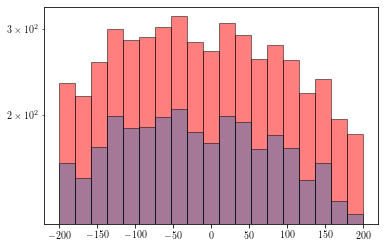

In [23]:
zedge = np.linspace(-Z, Z, 20) #edges
zmid = (zedge[:-1]+zedge[1:])/2
zs = gaia["z"].to_numpy()
dz = zedge[1]-zedge[0]
znum, _ = np.histogram(zs, bins=zedge)
zcor = znum/compz(zmid)

zs = gaia_raw["z"].to_numpy()
znum_raw, _ = np.histogram(zs, bins=zedge)

dz = zedge[1]-zedge[0]
plt.bar(zmid, zcor, width=dz, edgecolor="k", alpha=0.5, color="r")
plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
plt.yscale("log")
dz


# automate

In [34]:
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Proje

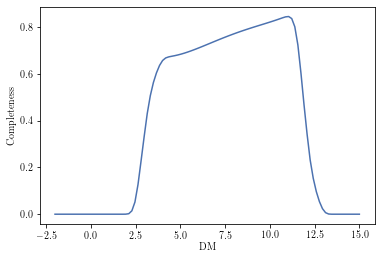

100%|██████████| 99/99 [00:00<00:00, 467.01it/s]


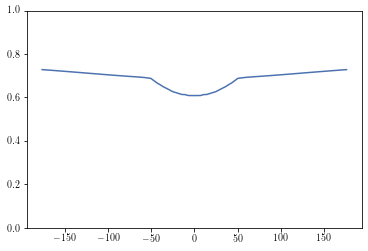

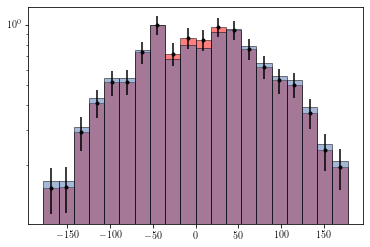

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

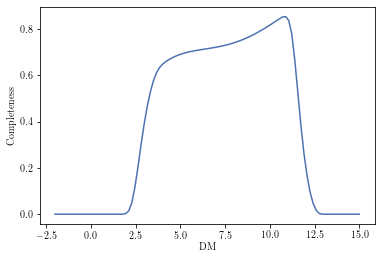

100%|██████████| 99/99 [00:00<00:00, 444.76it/s]


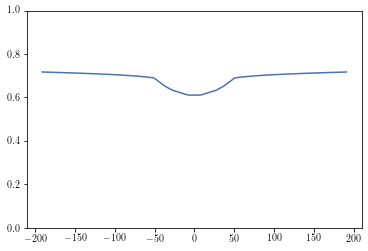

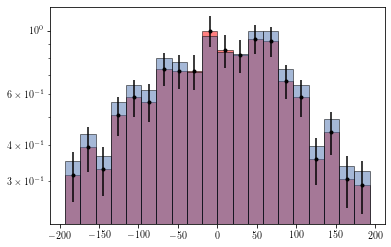

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

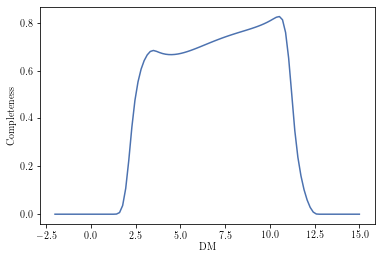

100%|██████████| 99/99 [00:00<00:00, 458.96it/s]


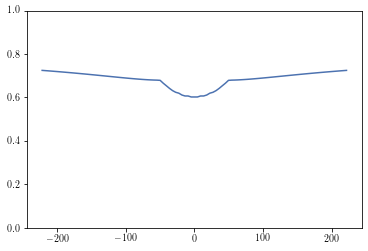

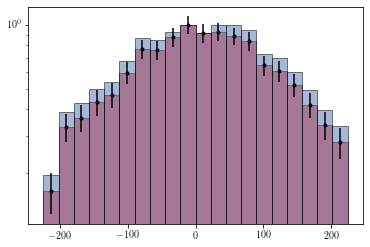

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

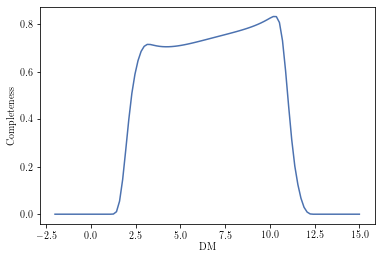

100%|██████████| 99/99 [00:00<00:00, 458.46it/s]


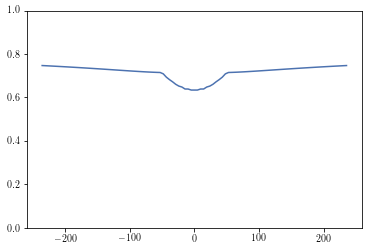

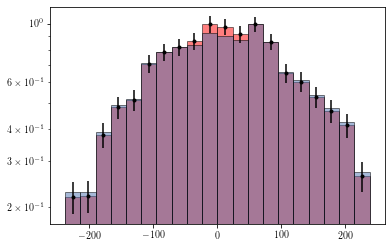

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

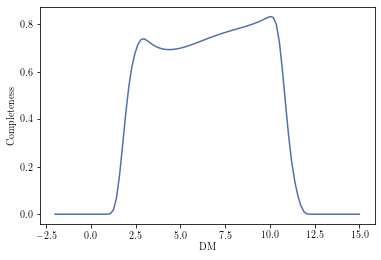

100%|██████████| 99/99 [00:00<00:00, 448.08it/s]


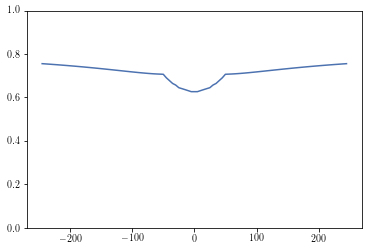

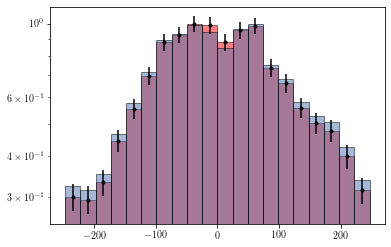

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

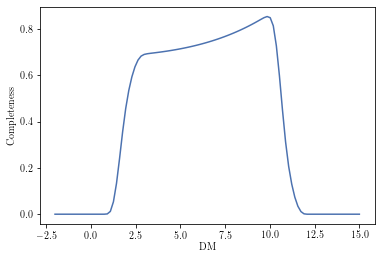

100%|██████████| 99/99 [00:00<00:00, 467.21it/s]


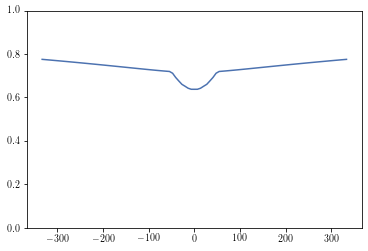

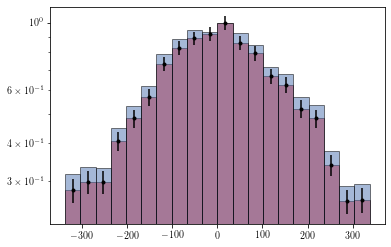

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

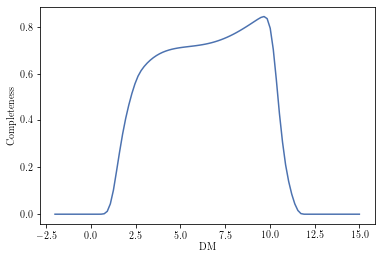

100%|██████████| 99/99 [00:00<00:00, 380.12it/s]


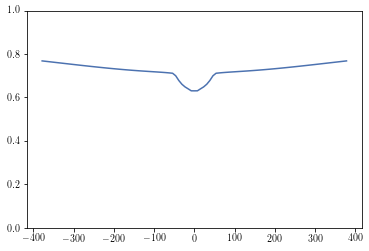

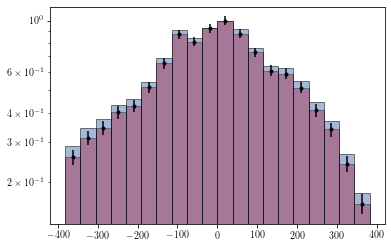

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

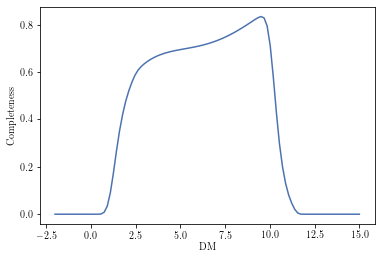

100%|██████████| 99/99 [00:00<00:00, 395.74it/s]


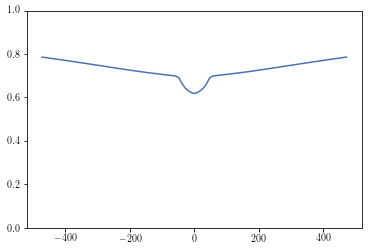

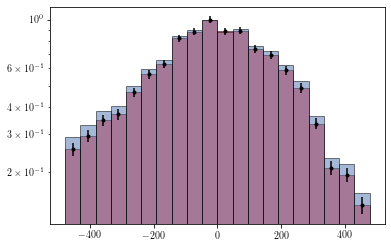

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

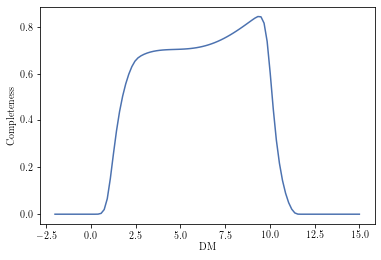

100%|██████████| 99/99 [00:00<00:00, 443.46it/s]


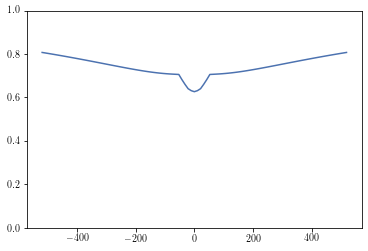

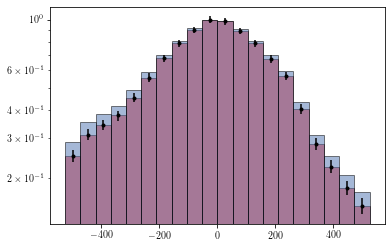

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

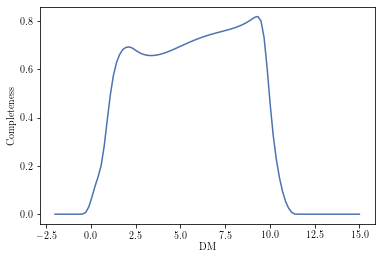

100%|██████████| 99/99 [00:00<00:00, 466.89it/s]


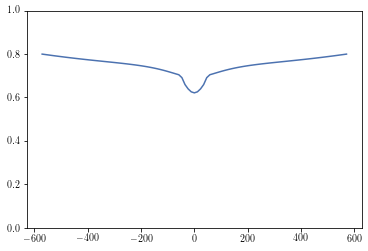

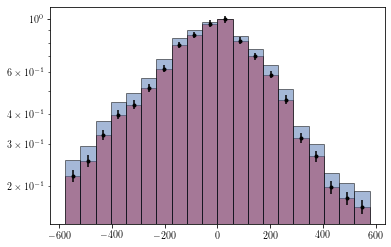

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

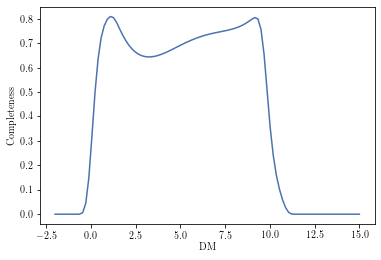

100%|██████████| 99/99 [00:00<00:00, 446.83it/s]


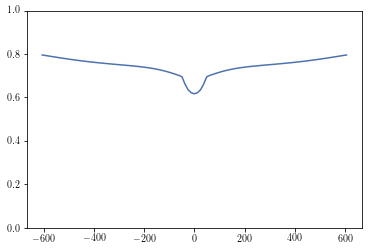

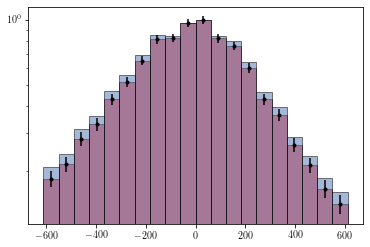

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

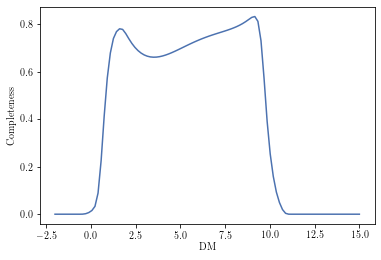

100%|██████████| 99/99 [00:00<00:00, 434.05it/s]


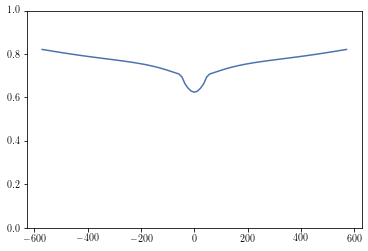

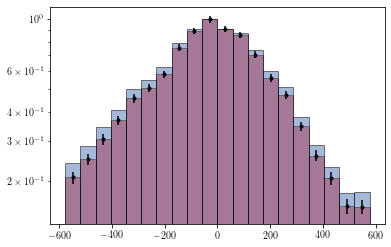

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

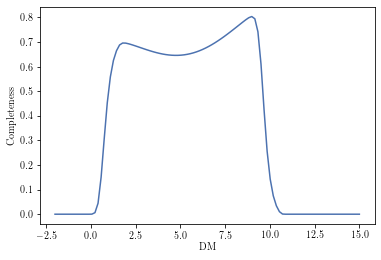

100%|██████████| 99/99 [00:00<00:00, 467.58it/s]


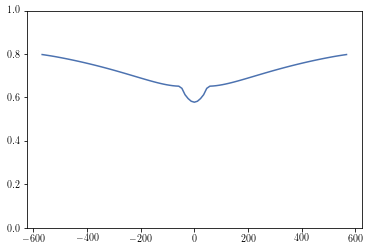

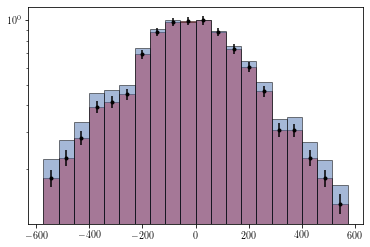

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

In [30]:
R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

for file, Z in zip(files, zb):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]

    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # plot
    plt.plot(DM, compDM)
    plt.xlabel("DM")
    plt.ylabel("Completeness")
    plt.show()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()
    gaia

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    zerr = znum_cor/np.sqrt(znum)
    znum_cor_max = znum_cor.max()
    znum_cor /= znum_cor_max
    zerr /= znum_cor_max

    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)
    znum_raw_max = znum_raw.max()
    znum_raw = znum_raw/znum_raw_max


    dz = zedge[1]-zedge[0]
    plt.bar(zmid, znum_cor, width=dz, edgecolor="k", alpha=0.5, color="r")
    plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
    plt.errorbar(zmid, znum_cor, yerr=zerr, fmt=".", color="k")
    plt.yscale("log")
    plt.show()
    df = vaex.from_arrays(zmid=zmid, znum=znum_cor, znum_raw=znum_raw, zerr=zerr)
    n = name.split("_")
    name = f"z_({n[1]})_({n[2]})"
    df.export(join(data_dir, name), progress=True)

In [1]:
name = "gaia_(0.1)_(0.2).hdf5"
n = name.split("_")
name = f"z_({n[1]})_({n[2]})"
name

'z_((0.1))_((0.2).hdf5)'

# all out

 92%|█████████▏| 11/12 [00:03<00:00,  3.11it/s]


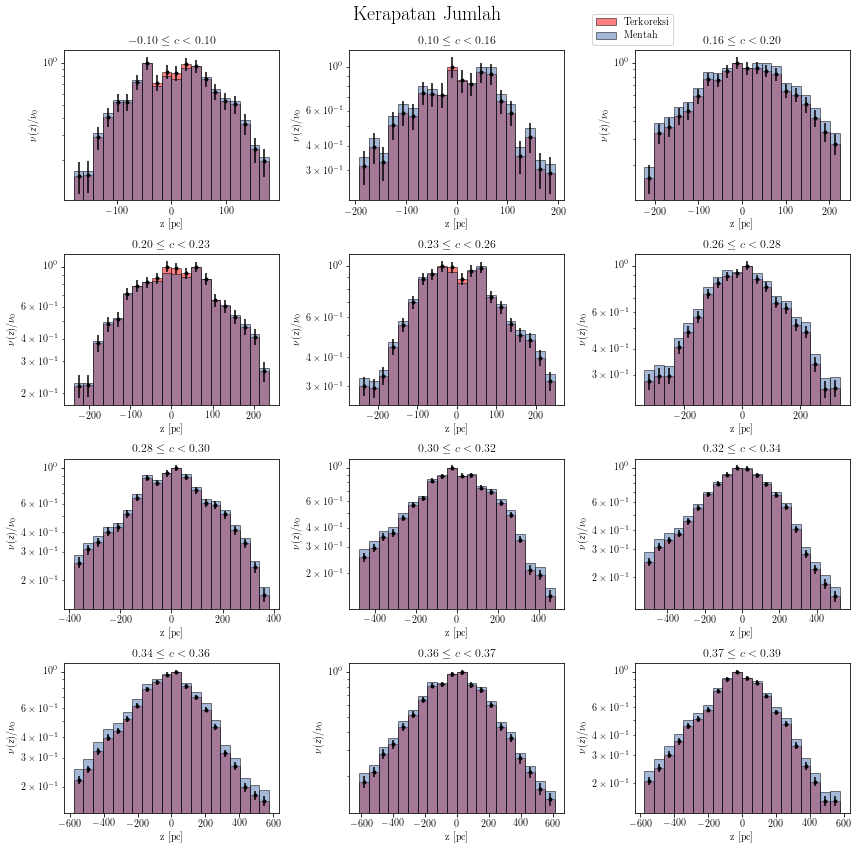

In [31]:
import re

# regex to extract the number from the file name inside ()
regex = re.compile(r"\((.*?)\)")

R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, (file, Z, ax) in enumerate(zip(files[:-1], tqdm(zb[:-1]), axes.flatten())):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in z:
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    
    zerr = znum_cor/np.sqrt(znum)
    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)

    dz = zedge[1]-zedge[0]
    ax.bar(zmid, znum_cor/znum_cor.max(), width=dz, edgecolor="k", alpha=0.5, color="r")
    ax.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
    ax.errorbar(zmid, znum_cor/znum_cor.max(), yerr=zerr/znum_cor.max(), fmt=".", color="k")
    ax.set_yscale("log")
    ax.set_title(r"${}\leq c < {}$".format(c[0], c[1]))
    ax.set_xlabel("z [pc]")
    ax.set_ylabel(r"$\nu(z)/\nu_0$")
    # df.export(join(data_dir, name), progress=True)
    if i==2:
        ax.legend(["Terkoreksi", "Mentah"], loc="lower right", bbox_to_anchor=(0.2, 1.0))
        # break
fig.tight_layout()
fig.suptitle("Kerapatan Jumlah", fontsize=20)
fig.subplots_adjust(top=0.93)
fig.savefig(join("img", "kerapatan-jumlah.pdf"), bbox_inches="tight")
